# 05_02 Compute()/Persist()
---

Basically, Dask uses the compute() method when we want to run the task scheduler. However, it consumes a large amount of computational resources because, when using the compute() method, Dask runs the entire task scheduler from start to finish.

But you don't need to worry about that. Dask also supports the persist() method, which creates a more advanced task scheduling process. Once you've completed part of the task scheduler, you can use persist() to retain the current state and continue from the next node.

In [1]:
import dask
import dask.dataframe as dd

In [2]:
# Boston Housing Dataset read and settings
dask_df = dd.read_csv("../data/boston/HousingData.csv")

In [3]:
dask_df.compute().describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
dask_df_new            = dask_df.copy()
dask_df_new['SAFE']    = dask_df_new['CRIM']<=180
dask_df_new['RM/MEDV'] = dask_df_new['RM']/dask_df_new['MEDV'] * 100
dask_df_new            = dask_df_new.dropna()

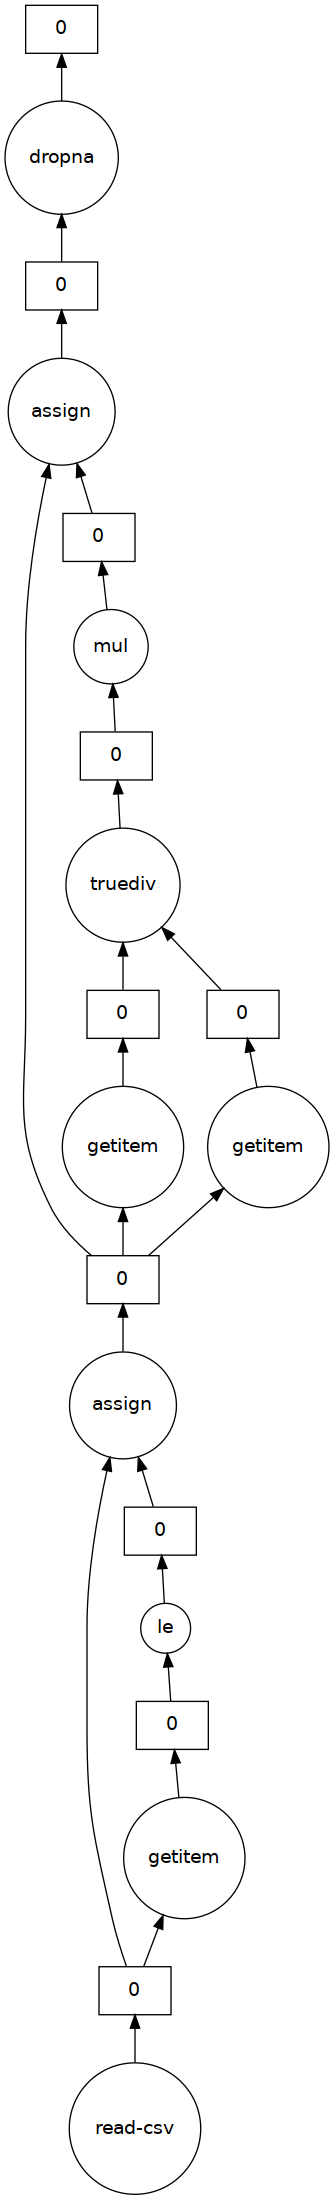

In [5]:
dask_df_new.visualize()

In [6]:
dask_df_new            = dask_df.copy()
dask_df_new['SAFE']    = dask_df_new['CRIM']<=180
dask_df_new            = dask_df_new.persist()
dask_df_new['RM/MEDV'] = dask_df_new['RM']/dask_df_new['MEDV'] * 100
dask_df_new            = dask_df_new.dropna()

In [7]:
dask_df.compute()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


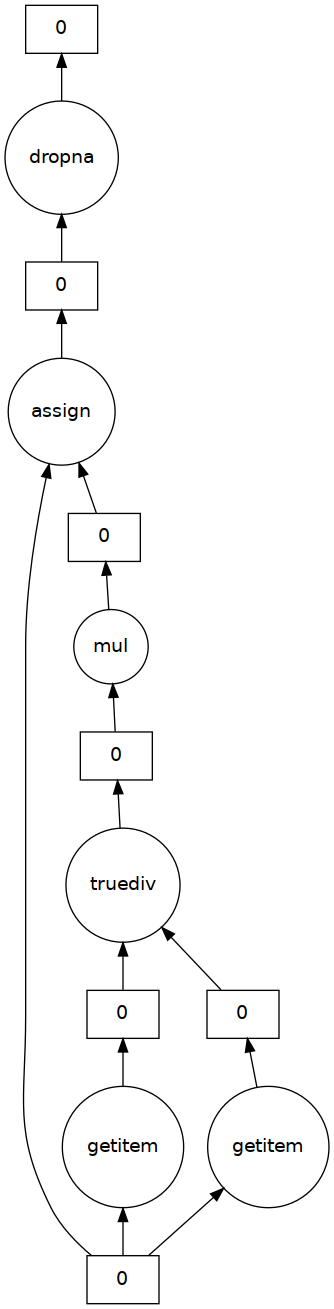

In [8]:
dask_df_new.visualize()

In [9]:
dask_df_new            = dask_df.copy()
dask_df_new['SAFE']    = dask_df_new['CRIM']<=180
dask_df_new['RM/MEDV'] = dask_df_new['RM']/dask_df_new['MEDV'] * 100
dask_df_new            = dask_df_new.persist()
dask_df_new            = dask_df_new.dropna()

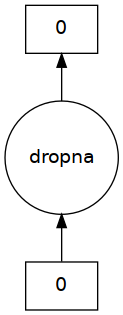

In [10]:
dask_df_new.visualize()

In [11]:
dask_df_new            = dask_df.copy()
dask_df_new['SAFE']    = dask_df_new['CRIM']<=180
dask_df_new['RM/MEDV'] = dask_df_new['RM']/dask_df_new['MEDV'] * 100
dask_df_new            = dask_df_new.dropna()
dask_df_new            = dask_df_new.persist()

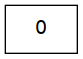

In [12]:
dask_df_new.visualize()

In [14]:
dask_df_new.compute()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,SAFE,RM/MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,True,27.395833
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,True,29.726852
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,True,20.706052
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,True,20.952096
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,True,22.404181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,True,31.822857
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8,True,35.875000
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,True,29.708738
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,True,29.188285
